<h1><center>

![](https://i.imgur.com/jrRGMfx.png)

AI PRACTITIONER COURSE 

PRACTICE LAB - SESSION 5 - SVM

**&copy; 2020 VTCA-COTAI. Internal Use Only.**

</center></h1>


In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Agenda



*   Linear kernel SVM on simple dataset
*   Polynomial kernel SVM on simple dataset
*   RBF kernel SVM on simple dataset
*   Tuning SVM


# Linear kernel SVM


**Using SVC (Support Vector Classifier) on sklearn to solve a simple linearly separable classification problem**

## Load data

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

In [ ]:
X, y = make_blobs(n_samples=1000, centers=2,
                  random_state=42, cluster_std=2)
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)
print("Number of datapoints in class 0: ", len(X[y == 0]))
print("Number of datapoints in class 1: ", len(X[y == 1]))

Shape of X: (1000, 2)
Shape of y: (1000,)
Number of datapoints in class 0:  500
Number of datapoints in class 1:  500


## Normalize data

In [ ]:
# TODO 
# Dua cac feature ve cung mot scale de tranh bi 1 class co gtri qua lon va 1 class co gtri qua nho
# 2. Tranh hien tuong tran so  
# 1. Apply Standard Scaler on X
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

## Visualize data

Text(0.5, 1.0, 'Dataset')

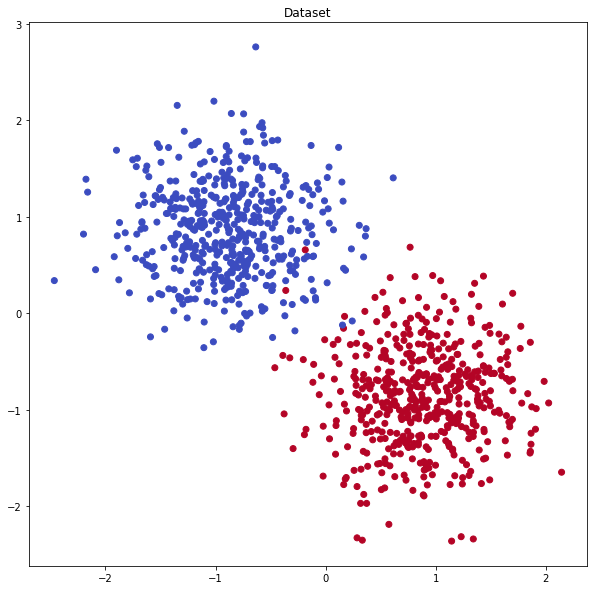

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y, cmap='coolwarm')
plt.title('Dataset')

In [ ]:
print(np.c_[np.array([1,2,3]), np.array([4,5,6])])
print(np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])])
x = np.array([[1, 2, 3], [4, 5, 6]])
print(np.ravel(x))

[[1 4]
 [2 5]
 [3 6]]
[[1 2 3 0 0 4 5 6]]
[1 2 3 4 5 6]


In [ ]:
def plot_decision_boundary(X, y, model, name, show_support_vector=False):
  # meshgrid
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
  # predict Z from meshgrid
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  
  plt.figure(figsize=(12, 12))
  
  plt.gca().contourf(xx, yy, Z, cmap='coolwarm', alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
  if show_support_vector == True:
    plt.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                marker='x', lw=2, facecolors='green');
  plt.xlim(x_min, x_max)
  plt.ylim(y_min, y_max)
  plt.title(name)

  plt.show()

## Apply SVM using sklearn

SVC's parameters from sklearn [Read more](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [ ]:
np.random.seed(42)
from sklearn.svm import SVC # "Support vector classifier"
# TODO
# 1. Create model object from SVC, use kernel='linear'
# 2. Fit on X and y
# 3. use model.score() on X, y to print out accuracy
model = SVC(kernel ='linear')
model.fit(X_scaled,y)
model.score(X_scaled,y)

0.996

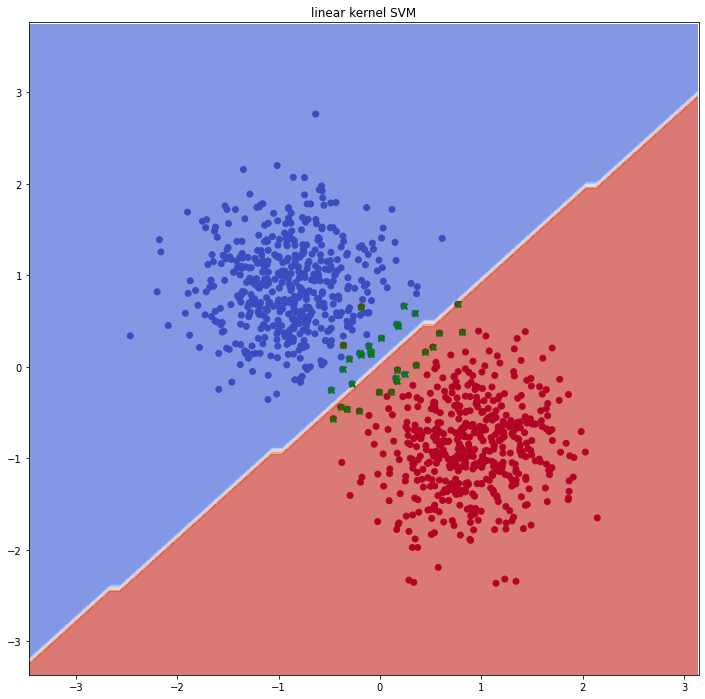

In [ ]:
# plot decision boundary
plot_decision_boundary(X_scaled,y,model, name='linear kernel SVM',show_support_vector=True)

# Polynomial Kernel SVM

**Using SVR (Support Vector Regressor) with Polynomial kernel to solve a regression problem**

## Load data

In [ ]:
np.random.seed(42)
# Random from the “standard normal” distribution
x = np.random.randn(2000,1)
# Random noise
noise = np.random.randn(2000,1)
y = 5 * (x**3) + 3 * (x**2) + 10 * noise + 2

## Visualize data

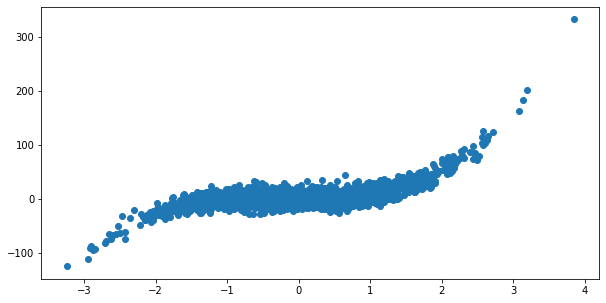

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(x, y)
plt.show()

## Apply SVR with Polynomial kernel

SVR's parameters from sklearn [Read more](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)

In [ ]:
np.random.seed(42)

# TODO
# 1. import SVR from sklearn
# 2. create SVR variable with kernel='linear'
# 3. fit on X, y
from sklearn.svm import SVR
# model = SVR(kernel = 'linear')
model = SVR(kernel = 'poly')
model.fit(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

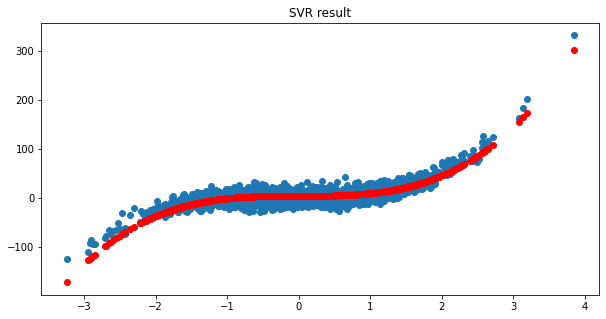

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(x, y)
plt.scatter(x, model.predict(x), c='red')
plt.title('SVR result')
plt.show()

Now go back and try ``kernel='poly'``

# RBF Kernel SVM

**Using SVC with RBF kernel to solve non-linearly separable problem**

**DATASET** https://drive.google.com/file/d/1l_pk2lAt8kf5_XDFbDga5XxOTi_UvI3Q/view?usp=sharing




## Load data

In [ ]:
import pickle

DATA_PATH = '/content/drive/My Drive/Colab Notebooks/rbf_data.pickle'

with open(DATA_PATH, 'rb') as file:
  data = pickle.load(file)

print('Shape of data:', data.shape)


Shape of data: (400, 3)


Get X, y from data

In [ ]:
# TODO
# 1. Get X from the first 2 columns 
# 2. Get y from the last column
# 3. Complete print_shape() function


X = data[:,:2]
y = data[:,-1]

def print_shape(X, y):  
  print('Shape of X:',X.shape)
  print('Shape of y:',y.shape )
  print("Number of datapoints in class 0: ",len(X[y == 0]) )
  print("Number of datapoints in class 1: ",len(X[y== 1]) )
print_shape(X,y)

Shape of X: (400, 2)
Shape of y: (400,)
Number of datapoints in class 0:  188
Number of datapoints in class 1:  212


Split data into Train Set and Test Set

In [ ]:
# TODO
# 1. Split X,y into Train Set and Test Set
from sklearn.model_selection import train_test_split as tts
#stratify : Dung cho phan loai [Chia theo ty le cua tap duoc goi vd trong TH nay y la 4:6] duy tri ty le cua viec chia tap train va tap test
X_train,X_test,y_train,y_test = tts(X,y, test_size = 0.4, shuffle = True, random_state = 42,stratify = y)


print('Shape of Train Set')
print_shape(X_train, y_train)
print('Shape of Test Set')
print_shape(X_test, y_test)

Shape of Train Set
Shape of X: (240, 2)
Shape of y: (240,)
Number of datapoints in class 0:  113
Number of datapoints in class 1:  127
Shape of Test Set
Shape of X: (160, 2)
Shape of y: (160,)
Number of datapoints in class 0:  75
Number of datapoints in class 1:  85


## Normalize data

Just don't run this cell at the moment

In [ ]:
# TODO
# 1. Apply Standard Scaler on X_train, X_test
from sklearn.preprocessing import StandardScaler
# ky vong du lieu cau X train va test tuong tu nhau
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


## Visualize data

Text(0.5, 1.0, 'Test Set')

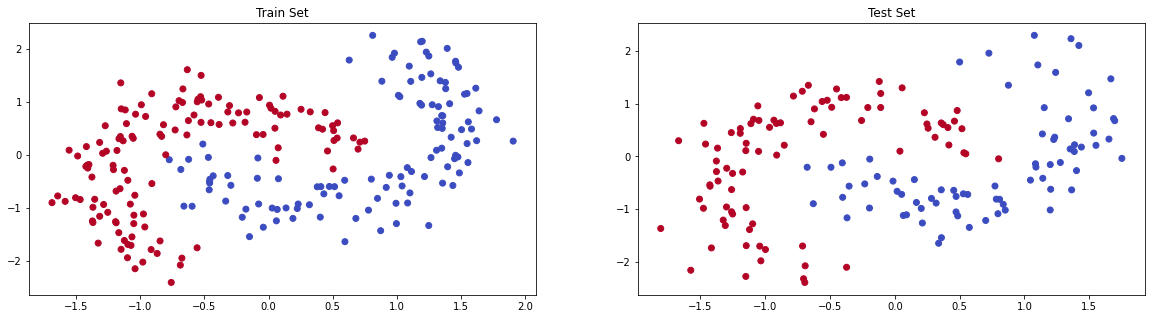

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='coolwarm')
plt.title('Train Set')

plt.subplot(1,2,2)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='coolwarm')
plt.title('Test Set')



## Apply SVM with RBF kernel

In [ ]:
np.random.seed(42)

# TODO
# 1. Import SVC
# 2. Create model from SVC, use kernel='rbf', C=1, gamma=10
# 3. Fit on Train Set
# 4. Use model.score to print out the accuracy on Train Set and Test Set
C = 1
gamma = 10
from sklearn.svm import SVC

model = SVC(kernel = 'rbf', C = C, gamma = gamma)
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))


0.9958333333333333
1.0


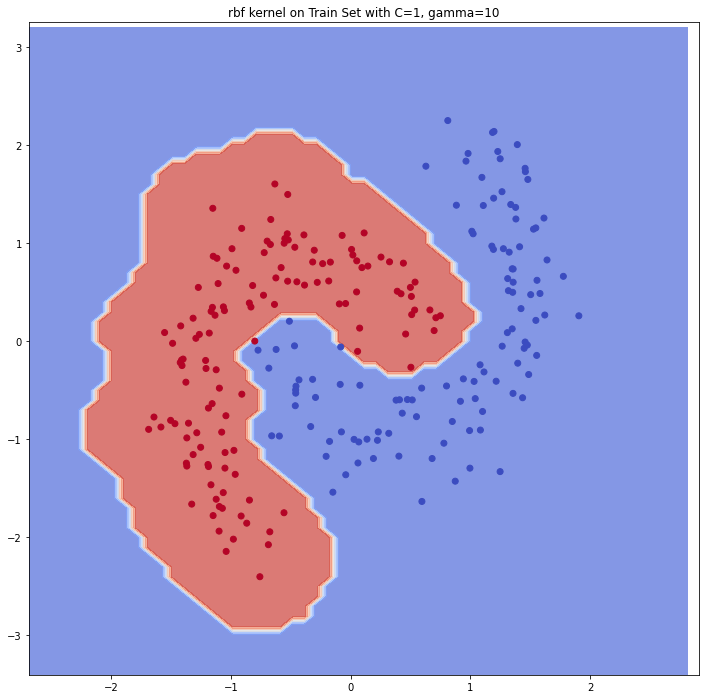

In [ ]:
# plot decision boundary Train Set
plot_decision_boundary(X_train, y_train, model,
                       name='rbf kernel on Train Set with C={}, gamma={}'.format(str(C), str(gamma)))

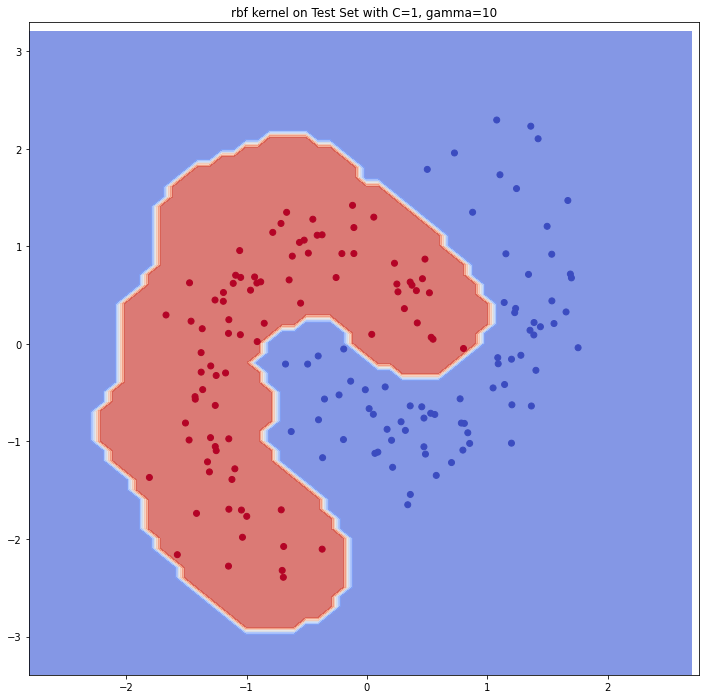

In [ ]:
# plot decision boundary Test Set
plot_decision_boundary(X_test, y_test, model,
                       name='rbf kernel on Test Set with C={}, gamma={}'.format(str(C), str(gamma)))

# Tuning SVM

Define GridSearch for C and gamma

In [ ]:
C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': C_values,
              'gamma': gamma_values}
model = SVC(kernel='rbf')
# fine-tune : di kiem thong so
#cv : chia thanh 5 phan bang nhau voi 5 lan train se tuong ung la 1 phan trong tap 
grid = GridSearchCV(model, param_grid, cv=5)

grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 1, 'gamma': 0.1}
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:
model = grid.best_estimator_
print('Accuracy score on Train Set:',str(model.score(X_train, y_train)))
print('Accuracy score on Test Set:',str(model.score(X_test, y_test)))


Accuracy score on Train Set: 1.0
Accuracy score on Test Set: 1.0


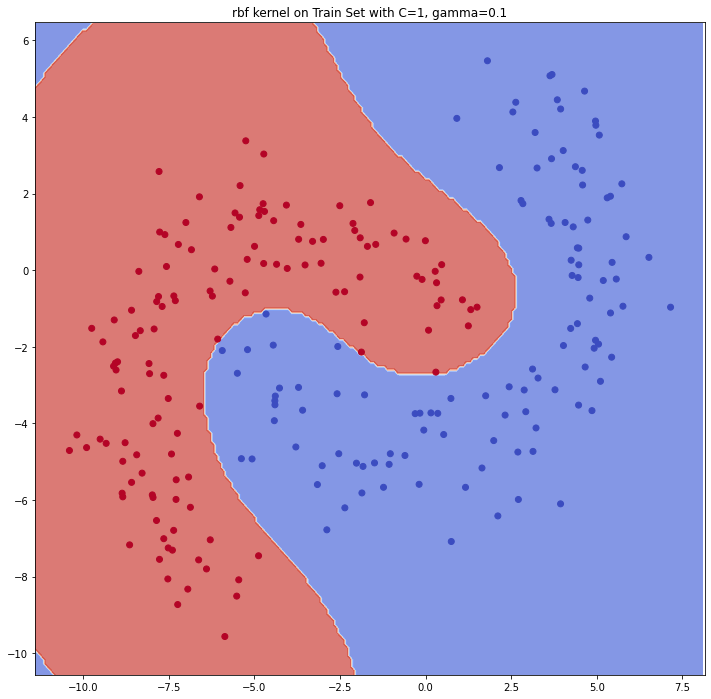

In [ ]:
# plot decision boundary Train Set
chart_name = 'rbf kernel on Train Set with C={}, gamma={}'.format(grid.best_params_['C'], grid.best_params_['gamma'])
plot_decision_boundary(X_train, y_train, model,
                       name=chart_name)

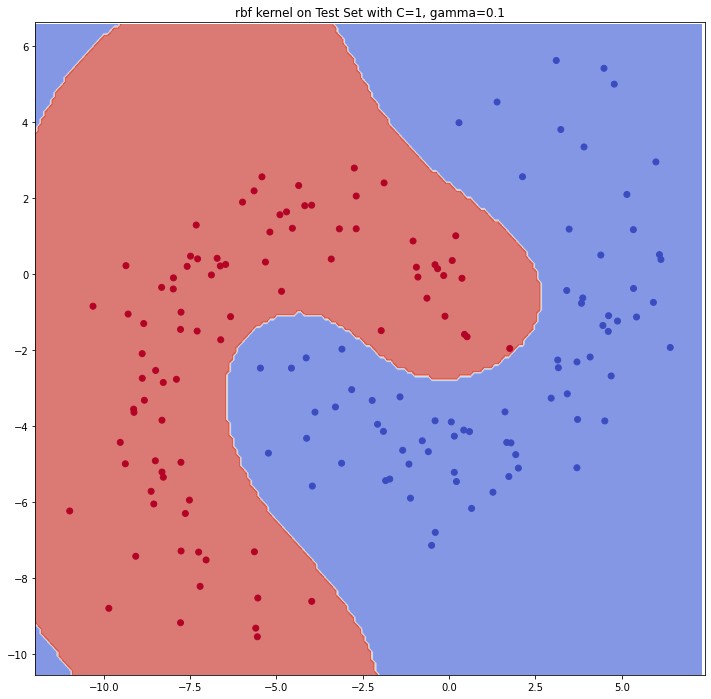

In [ ]:
# plot decision boundary Test Set
chart_name = 'rbf kernel on Test Set with C={}, gamma={}'.format(grid.best_params_['C'], grid.best_params_['gamma'])
plot_decision_boundary(X_test, y_test, model,
                       name=chart_name)

## Bonus: How to search for all hyper-parameters

In [ ]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear','poly'], 'C': [1, 10, 100, 1000]}]